# **Import Libraries**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read dataset

In [17]:
df = pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')

# Preprocessing

In [18]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [19]:
df.duplicated().sum()

0

# Exploratory data analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [21]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [22]:
df.shape

(99457, 10)

# Analysis and Visualization

In [23]:
# Analytics gender customers
gender = df.groupby('gender')['gender'].value_counts()
gender

gender
Female    59482
Male      39975
Name: count, dtype: int64

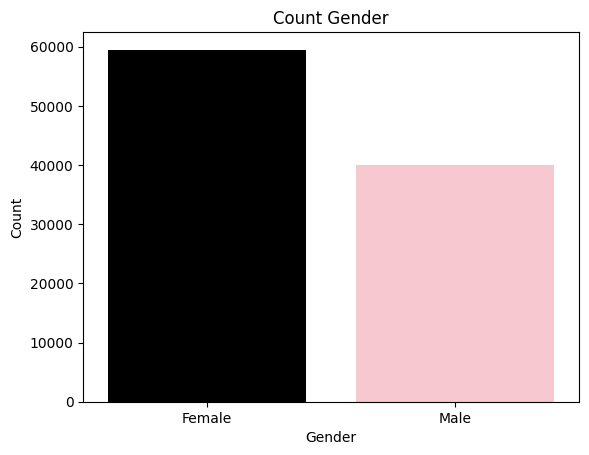

In [25]:
sns.set_palette(['black', 'pink'])
sns.barplot(x=gender.index, y=gender.values)
plt.title('Count Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [26]:
# Analytics payment method
payment = df['payment_method'].value_counts()
payment

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

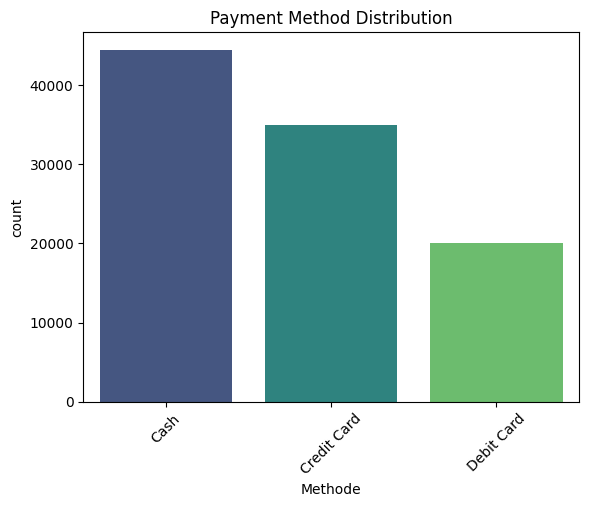

In [28]:
sns.barplot(x=payment.index, y=payment.values, palette='viridis')
plt.title('Payment Method Distribution')
plt.xlabel('Methode')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [29]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

In [30]:
df['invoice_year'] = df['invoice_date'].dt.year

In [31]:
yearly_invoice_counts = df['invoice_year'].value_counts().sort_index()

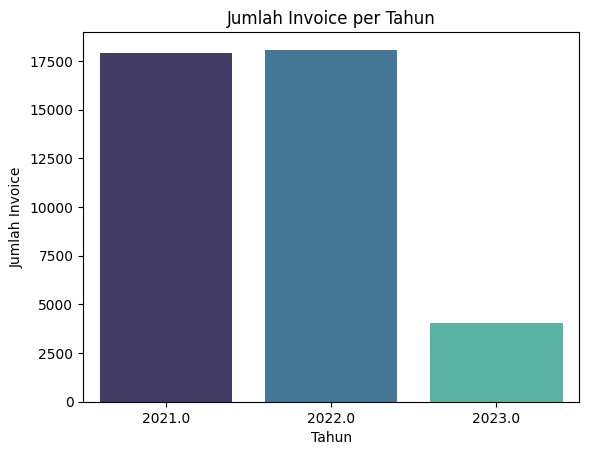

In [32]:
sns.barplot(x=yearly_invoice_counts.index, y=yearly_invoice_counts.values, palette='mako')
plt.title('Jumlah Invoice per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Invoice')
plt.show()

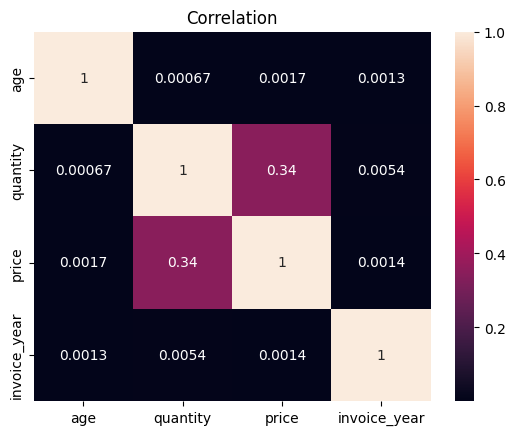

In [33]:
sns.heatmap(data=df.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation')
plt.show()

In [34]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

df['invoice_year'] = df['invoice_date'].dt.year

year_gender_counts = df.groupby(['invoice_year', 'gender'])['customer_id'].nunique().reset_index(name='count')
print(year_gender_counts)

   invoice_year  gender  count
0        2021.0  Female  10748
1        2021.0    Male   7144
2        2022.0  Female  10827
3        2022.0    Male   7250
4        2023.0  Female   2417
5        2023.0    Male   1643


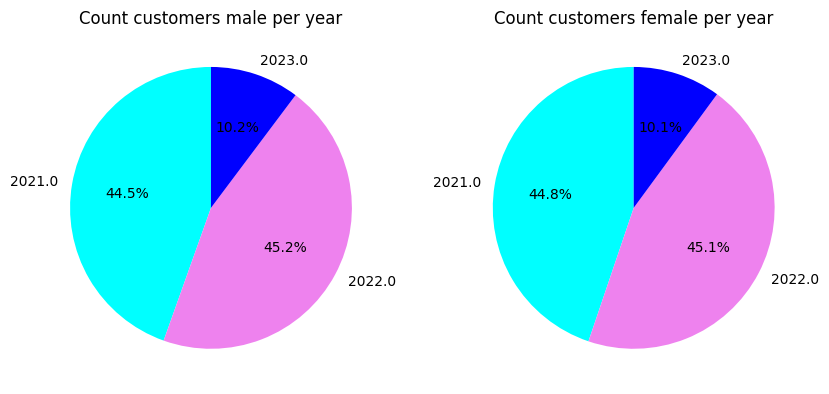

In [35]:
# Memisahkan data untuk setiap gender
male_data = year_gender_counts[year_gender_counts['gender'] == 'Male']
female_data = year_gender_counts[year_gender_counts['gender'] == 'Female']

# Membuat dictionary untuk mapping warna sesuai dengan tahun
color_mapping = {
    2021: 'cyan',
    2022: 'violet',
    2023: 'blue'
}

# Visualisasi menggunakan pie chart untuk gender pria
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(male_data['count'], labels=male_data['invoice_year'], autopct='%1.1f%%', startangle=90, colors=[color_mapping[year] for year in male_data['invoice_year']])
plt.title('Count customers male per year')

# Visualisasi menggunakan pie chart untuk gender wanita
plt.subplot(1, 2, 2)
plt.pie(female_data['count'], labels=female_data['invoice_year'], autopct='%1.1f%%', startangle=90, colors=[color_mapping[year] for year in female_data['invoice_year']])
plt.title('Count customers female per year')

plt.show()


In [36]:
payment_gender_counts = df.groupby(['payment_method', 'gender'])['payment_method'].count().reset_index(name='count')
print(payment_gender_counts)

  payment_method  gender  count
0           Cash  Female  26509
1           Cash    Male  17938
2    Credit Card  Female  21011
3    Credit Card    Male  13920
4     Debit Card  Female  11962
5     Debit Card    Male   8117


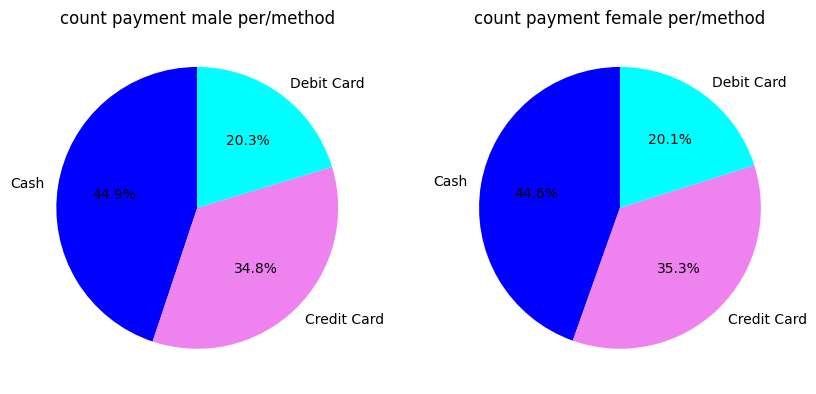

In [37]:
# Memisahkan data untuk setiap gender
male_data = payment_gender_counts[payment_gender_counts['gender'] == 'Male']
female_data = payment_gender_counts[payment_gender_counts['gender'] == 'Female']

# Membuat dictionary untuk mapping warna sesuai dengan preferensi
color_mapping = {
    'Male': ['blue', 'violet', 'cyan'],
    'Female': ['blue', 'violet', 'cyan']
}

# Visualisasi menggunakan pie chart untuk gender pria
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(male_data['count'], labels=male_data['payment_method'], autopct='%1.1f%%', startangle=90, colors=color_mapping['Male'])
plt.title('count payment male per/method')

# Visualisasi menggunakan pie chart untuk gender wanita
plt.subplot(1, 2, 2)
plt.pie(female_data['count'], labels=female_data['payment_method'], autopct='%1.1f%%', startangle=90, colors=color_mapping['Female'])
plt.title('count payment female per/method')

plt.show()
